Flores Lara Alberto 6BV1

Clasificación para CIFAR usando MLP

Librerias necesarias:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import time

Definir las funciones para crear la MLP y para el entrenamiento y validación del modelo

In [2]:
# Función para construir MLP
def build_mlp(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Función genérica para entrenar y evaluar
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=64):
    model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    end_time = time.time()

    # Evaluación
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred, target_names=[f'Clase {i}' for i in range(10)])
    print(report)
    print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

    return history, end_time - start_time

Cargar los datos de entrada

In [3]:
# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [4]:
model_mlp = build_mlp((32, 32, 3))
history_mlp, time_mlp = train_and_evaluate(model_mlp, x_train, y_train_cat, x_test, y_test_cat)

c:\Users\albsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2287 - loss: 4.3134 - val_accuracy: 0.3149 - val_loss: 1.8688
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3244 - loss: 1.8553 - val_accuracy: 0.3751 - val_loss: 1.7554
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3512 - loss: 1.8020 - val_accuracy: 0.3472 - val_loss: 1.7910
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3548 - loss: 1.7928 - val_accuracy: 0.3479 - val_loss: 1.7920
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3529 - loss: 1.7920 - val_accuracy: 0.3547 - val_loss: 1.7854
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3604 - loss: 1.7745 - val_accuracy: 0.3859 - val_loss: 1.7309
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3594 - loss: 1.7807 - val_accuracy: 0.3690 - val_loss: 1.7780
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3586 - loss: 1.7847 - val_acc

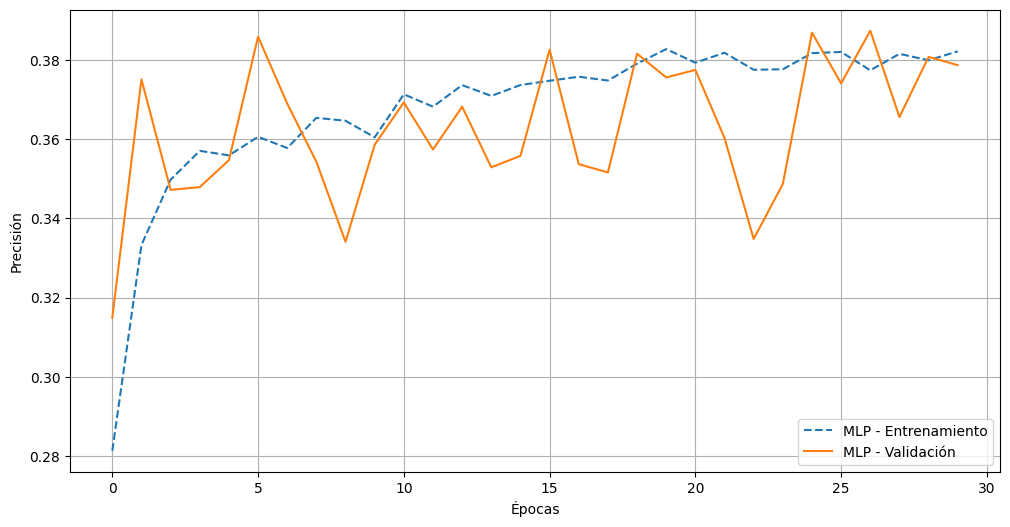

In [5]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_mlp], ['MLP'])


Clasificación para Mnist usando MLP

Cargar los datos de entrada

In [6]:
# Cargar Mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [9]:
model_mlp = build_mlp((28, 28, 1))
history_mlp, time_mlp = train_and_evaluate(model_mlp, x_train, y_train_cat, x_test, y_test_cat, 10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8876 - loss: 0.3865 - val_accuracy: 0.9515 - val_loss: 0.1838
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9559 - loss: 0.1619 - val_accuracy: 0.9586 - val_loss: 0.1723
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9640 - loss: 0.1276 - val_accuracy: 0.9527 - val_loss: 0.2263
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9675 - loss: 0.1222 - val_accuracy: 0.9670 - val_loss: 0.1315
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9730 - loss: 0.1024 - val_accuracy: 0.9578 - val_loss: 0.1692
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9741 - loss: 0.0972 - val_accuracy: 0.9586 - val_loss: 0.1687
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9764 - loss: 0.0873 - val_accuracy: 0.9641 - val_loss: 0.1857
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9760 - loss: 0.0904 - val_accuracy: 0.

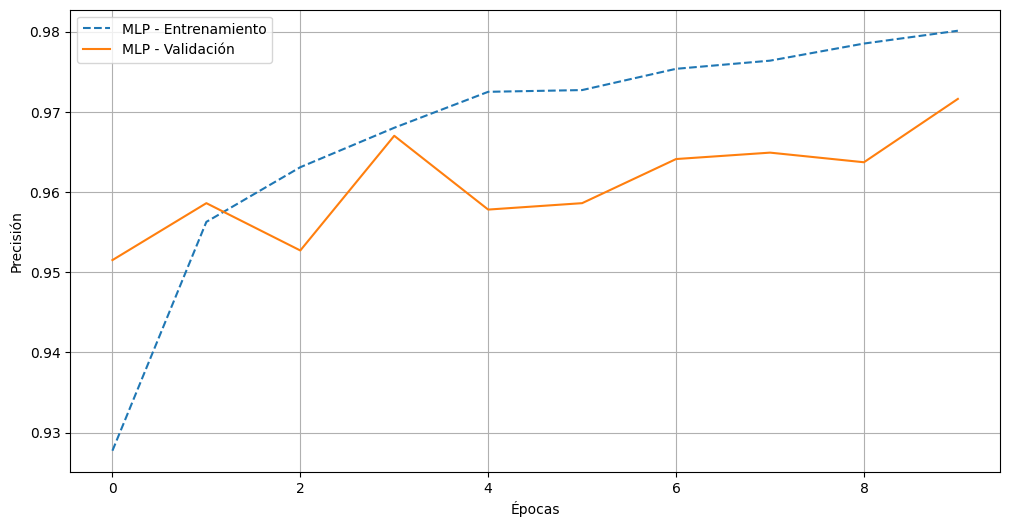

In [10]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_mlp], ['MLP'])
